Task 1 - Build Four Graph Variants
Using the same base graph structure as in your written homework (the manual DFS/DFS exercise), construct:

Weighted Directed graph
Weighted Undirected graph
Unweighted Undirected graph
Unweighted Directed graph

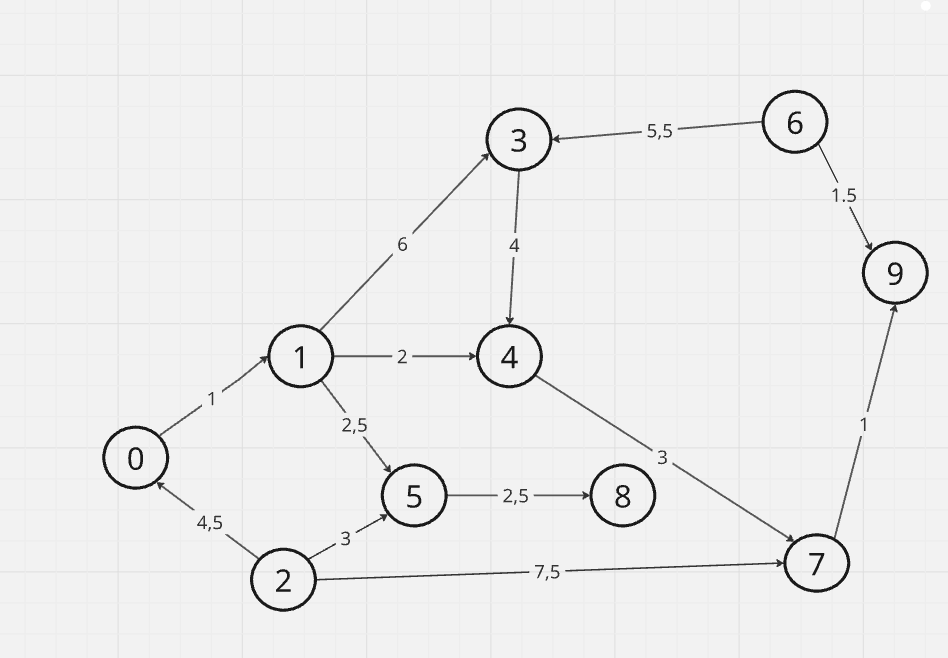

In [8]:
import pprint
from graph_factory import GraphFactory
from algorithmics import GraphAlgorithms
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
NUM_VERTICES = 10

EDGES: List[Tuple[int, int, Union[int, float]]] = [
    (0, 1, 1.0), (0, 2, 4.5),
    (1, 3, 6.0), (1, 4, 2.0), (1, 5, 2.5),
    (2, 5, 3.0),
    (3, 4, 4.0), (3, 6, 5.5),
    (4, 7, 3.0),
    (5, 8, 2.5),
    (6, 9, 1.5),
    (7, 9, 1.0)
]

EDGES_WEIGHTED = [
    (0, 1, 1.0), (0, 2, 1.5),
    (1, 3, 6.0), (1, 4, 2.0), (1, 5, 2.5),
    (2, 5, 3.0),
    (3, 4, 4.0), (3, 6, 5.5),
    (4, 7, 3.0),
    (5, 8, 2.5),
    (6, 9, 1.5),
    (7, 9, 1.0)
]

g_wd = GraphFactory.from_edges(NUM_VERTICES, EDGES, directed=True)

g_wud = GraphFactory.from_edges(NUM_VERTICES, EDGES, directed=False)

UNWEIGHTED_EDGES = [(u, v, 1.0) for u, v, w in EDGES]
g_uwud = GraphFactory.from_edges(NUM_VERTICES, UNWEIGHTED_EDGES, directed=False)

g_uwd = GraphFactory.from_edges(NUM_VERTICES, UNWEIGHTED_EDGES, directed=True)

Task 2 - Apply Algorithms (BFS, DFS, Components, Stats)
After you implement the TODO's in algorithmics.py and the required representations in graph_abc.py:

For unweighted directed and undirected graphs:

Run BFS from a chosen start vertex (note your choice).

Run DFS from the same start vertex.

Compute connected components:

For undirected graphs: standard components.
For directed graphs: weakly connected components (ignore directions).
Compute component statistics: for each component, report

vertices (sorted),
node_count,
edge_count (count undirected edges once; count directed edges with both endpoints in the component),
smallest_vertex

In [20]:
START_VERTEX = 0
graphs_to_test = {
    "Unweighted Undirected": g_uwud,
    "Unweighted Directed": g_uwd
}

for name, graph in graphs_to_test.items():
    print(f"Analyzing: {name} Graph")

    # 1. BFS
    bfs_order = GraphAlgorithms.bfs(graph, START_VERTEX)
    print(f"1. BFS order from vertex {START_VERTEX}: {bfs_order}")

    # 2. DFS
    dfs_order = GraphAlgorithms.dfs(graph, START_VERTEX)
    print(f"2. DFS order from vertex {START_VERTEX}: {dfs_order}")

    # 3. Connected Components
    components = GraphAlgorithms.connected_components(graph)
    print(f"3. Connected Components:")
    pprint.pprint(components)

    # 4. Component Statistics
    stats = GraphAlgorithms.components_with_stats(graph)
    print(f"4. Component Statistics (sorted):")
    pprint.pprint(stats)

Analyzing: Unweighted Undirected Graph
1. BFS order from vertex 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2. DFS order from vertex 0: [0, 1, 3, 4, 7, 9, 6, 5, 2, 8]
3. Connected Components:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
4. Component Statistics (sorted):
[{'edge_count': 12,
  'node_count': 10,
  'smallest_vertex': 0,
  'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]
Analyzing: Unweighted Directed Graph
1. BFS order from vertex 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2. DFS order from vertex 0: [0, 1, 3, 4, 7, 9, 6, 5, 8, 2]
3. Connected Components:
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
4. Component Statistics (sorted):
[{'edge_count': 12,
  'node_count': 10,
  'smallest_vertex': 0,
  'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


Task 3 - Visualize One Graph with NetworkX
Pick any one of the four graphs (the most interesting one) and draw it using NetworkX.

<Figure size 1200x800 with 0 Axes>

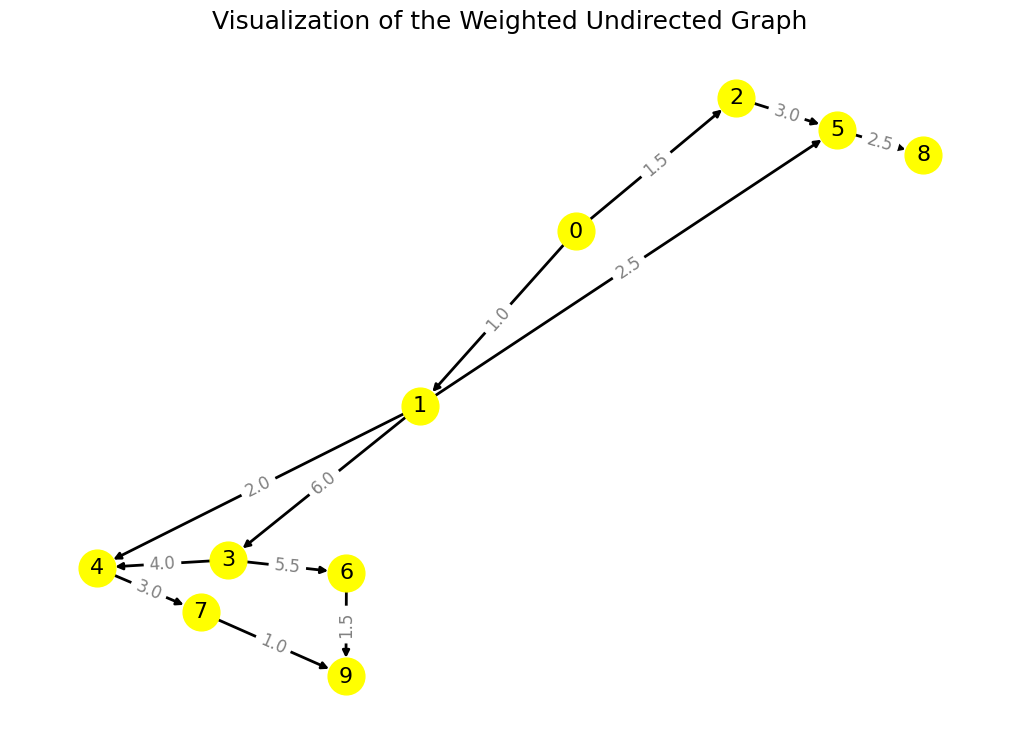

In [25]:
G_nx = nx.DiGraph()

G_nx.add_nodes_from(range(g_wd.vertices))

adj = g_wd.get_adjacency_list()
edges_to_add = [(u, v, {'weight': w}) for u, neighbors in adj.items() for v, w in neighbors]
G_nx.add_edges_from(edges_to_add)

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_nx, seed=12)
edge_labels = nx.get_edge_attributes(G_nx, 'weight')

plt.figure(figsize=(10, 7))
nx.draw(G_nx, pos, with_labels=True, node_color='yellow', node_size=700, font_size=16, width=2)
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels, font_color='gray', font_size=12)

plt.title("Visualization of the Weighted Undirected Graph", size=18)
plt.show()